In [2]:
import numpy
from matplotlib import pyplot

%matplotlib inline

In [4]:
L = 0.01
nx, ny = 21 , 21
dx = L / (nx - 1)
dy = L / (ny - 1)

x = numpy.linspace(0.0, L, num=nx)
y = numpy.linspace(0.0, L, num=ny)

alpha = 1e-4

#Initial conditions
T0 = numpy.full((ny, nx), 20.0) #T_i,j--T[j,i],因为先查找列，再在列找到的[]中查找行（第几个数）
T0[0,:] = 100.0 #bottom boundary
T0[:,0] = 100.0 #left boundary

In [5]:
def ftcs(T0, nt, dt, dx, dy, alpha, qx=0.0, qy=0.0):
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    ny, nx = T.shape
    I, J = nx // 2, ny // 2
    for n in range(nt):
        T[1:-1,1:-1] = (T[1:-1,1:-1] + 
                        sigma_x *
                        (T[1:-1,:-2] - 2 * T[1:-1,1:-1] + T[1:-1, 2:]) +
                        sigma_y *
                        (T[:-2, 1:-1] - 2 *T[1:-1, 1:-1] + T[2:,1:-1]))
        #Update boundary values (Neumann conditions)
        T[:, -1] = T[:, -2] + qx * dx #right boundary
        T[-1, :] = T[-2, :] + qy * dy #bottom boundary
        if T[J, I] >= 70.0:
            break
    
    print(n + 1, T[J,I])
        
    return T

In [6]:
nt = 500
sigma = 0.25
dt = sigma * min(dx,dy)**2 / alpha


T = ftcs(T0, nt, dt, dx, dy, alpha)

256 70.02138294076661


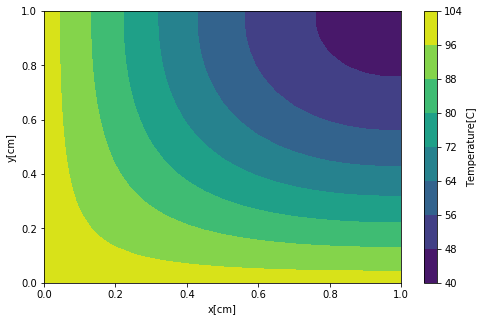

In [8]:
pyplot.figure(figsize=(8.0,5.0))
pyplot.xlabel('x[cm]')
pyplot.ylabel('y[cm]')
contf = pyplot.contourf(x * 100, y * 100, T);
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature[C]')